In [1]:
import cv2
import numpy as np
from models import Yolov4
from utils import get_detection_data, draw_on_image

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
model = Yolov4(class_names=[str(i) for i in range(80)],
              weight_path='yolov4.weights',
               img_size=(416, 416, 3),
              )

In [3]:
model.build_model()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
all weights read
12
bs:  Tensor("strided_slice_3:0", shape=(), dtype=int32)
(?, 0, 4) (?, 52, 52, 3, 4)
(?, ?, 4) (?, 26, 26, 3, 4)
(?, ?, 4) (?, 13, 13, 3, 4)


In [4]:
img = cv2.imread('test.jpg')[:,:,::-1]
img = cv2.resize(img, (416, 416))

imgs = np.expand_dims(img, axis=0)
imgs = imgs / 255.

In [5]:
pred_output = model.inference_model.predict(imgs)

In [6]:
detections = get_detection_data(image=img, 
                                image_name='street', 
                                outputs=pred_output, 
                                class_names=[str(i) for i in range(80)])

In [7]:
detections

,image,object_name,x1,y1,x2,y2,score,image_width,image_height
0,street,0,356,137,389,370,0.947872,416,416
1,street,0,186,141,212,355,0.880507,416,416
2,street,0,119,128,146,358,0.879865,416,416
3,street,0,7,142,37,366,0.873770,416,416
4,street,0,165,144,190,356,0.864384,416,416
5,street,0,94,132,122,355,0.858891,416,416
6,street,0,219,146,248,360,0.834838,416,416
7,street,0,55,145,79,360,0.832151,416,416
8,street,27,305,174,310,205,0.814926,416,416
9,street,0,251,145,273,213,0.620157,416,416


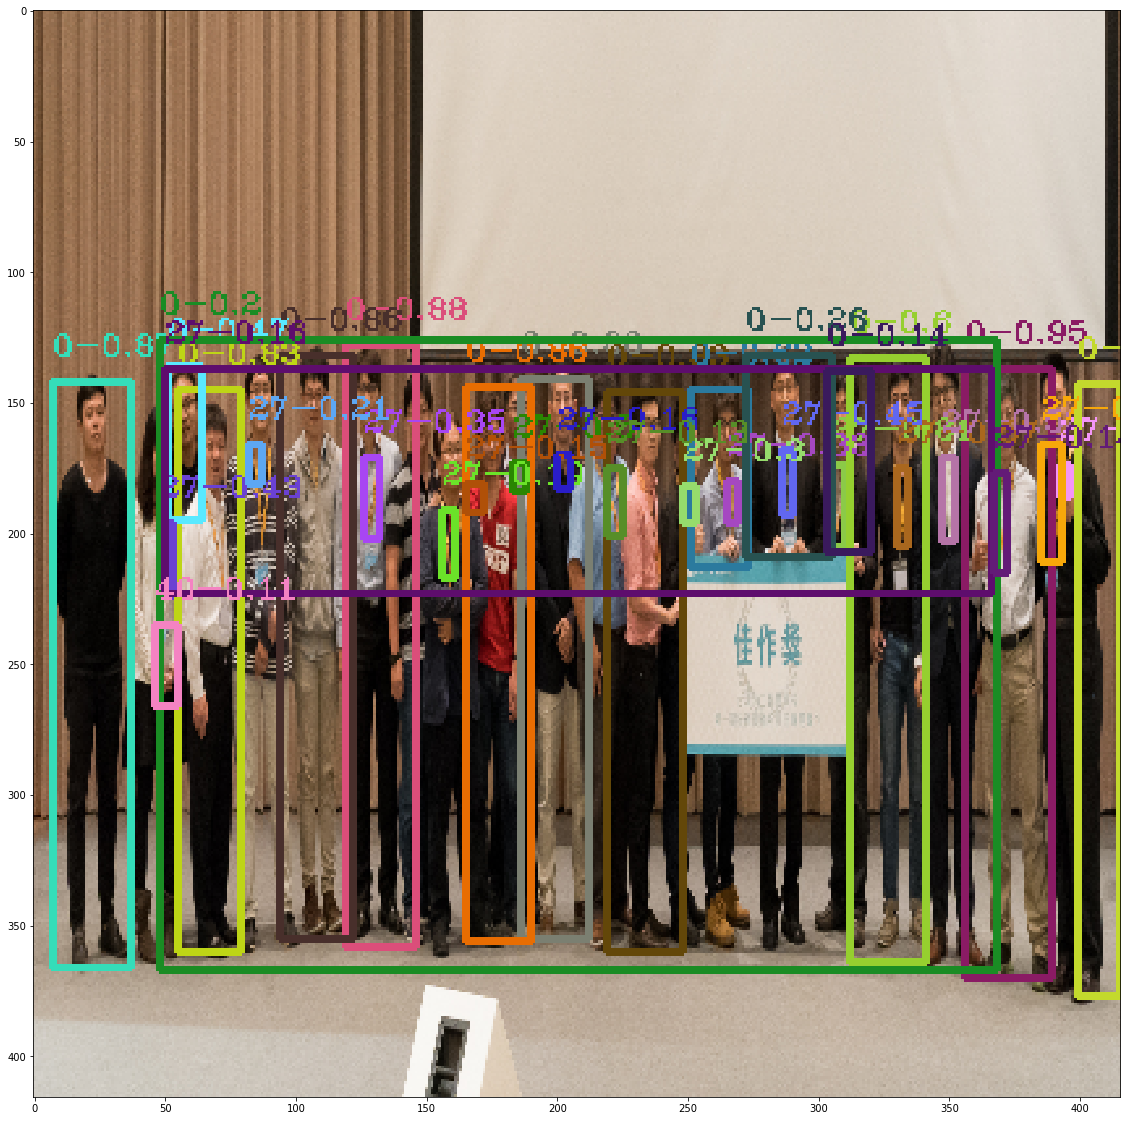

In [8]:
draw_on_image(img, detections)

In [9]:
'123'.endswith('13')

False